<a href="https://colab.research.google.com/github/NDsasuke/Decision-Trees/blob/main/DecisionTree_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets
import matplotlib.pyplot as plt

Split

In [18]:
X, y = datasets.load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [19]:
X_train

array([[1.032e+01, 1.635e+01, 6.531e+01, ..., 2.381e-02, 2.681e-01,
        7.399e-02],
       [2.018e+01, 1.954e+01, 1.338e+02, ..., 2.173e-01, 3.032e-01,
        8.075e-02],
       [1.066e+01, 1.515e+01, 6.749e+01, ..., 0.000e+00, 2.710e-01,
        6.164e-02],
       ...,
       [1.546e+01, 2.395e+01, 1.038e+02, ..., 2.163e-01, 3.013e-01,
        1.067e-01],
       [1.705e+01, 1.908e+01, 1.134e+02, ..., 2.543e-01, 3.109e-01,
        9.061e-02],
       [1.088e+01, 1.562e+01, 7.041e+01, ..., 7.966e-02, 2.581e-01,
        1.080e-01]])

model define

In [20]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [21]:
y_pred = dt.predict(X_test)
accuracy_score(y_test, y_pred)

0.9210526315789473

In [22]:
X.shape

(569, 30)

features

In [23]:
dt.feature_importances_

array([0.        , 0.01153616, 0.00640898, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.05390749, 0.        , 0.01237089, 0.00181207,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.71433207, 0.03147265, 0.        , 0.00865212, 0.01297818,
       0.        , 0.01671162, 0.11883097, 0.01098682, 0.        ])

[Text(0.6363636363636364, 0.9166666666666666, 'x[20] <= 16.795\ngini = 0.468\nsamples = 455\nvalue = [170, 285]'),
 Text(0.4090909090909091, 0.75, 'x[27] <= 0.136\ngini = 0.162\nsamples = 304\nvalue = [27, 277]'),
 Text(0.22727272727272727, 0.5833333333333334, 'x[13] <= 91.555\ngini = 0.036\nsamples = 271\nvalue = [5, 266]'),
 Text(0.18181818181818182, 0.4166666666666667, 'x[13] <= 38.605\ngini = 0.029\nsamples = 270\nvalue = [4, 266]'),
 Text(0.09090909090909091, 0.25, 'x[14] <= 0.003\ngini = 0.015\nsamples = 259\nvalue = [2, 257]'),
 Text(0.045454545454545456, 0.08333333333333333, 'gini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.13636363636363635, 0.08333333333333333, 'gini = 0.008\nsamples = 254\nvalue = [1, 253]'),
 Text(0.2727272727272727, 0.25, 'x[11] <= 2.007\ngini = 0.298\nsamples = 11\nvalue = [2, 9]'),
 Text(0.22727272727272727, 0.08333333333333333, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.3181818181818182, 0.08333333333333333, 'gini = 0.444\nsamples = 3\nvalue

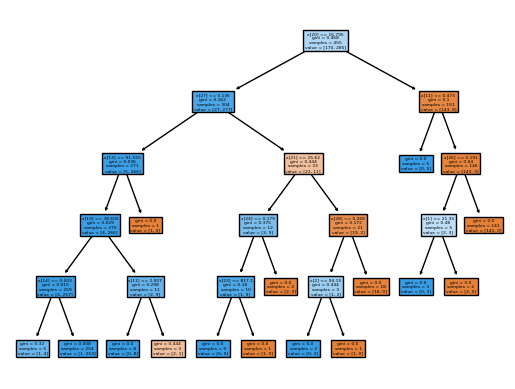

In [24]:
tree.plot_tree(dt, filled=True)

In [25]:
import pandas as pd
df = pd.DataFrame(dt.feature_importances_)
df[ df[0] > 0.005 ]

,0
1,0.011536
2,0.006409
11,0.053907
13,0.012371
20,0.714332
21,0.031473
23,0.008652
24,0.012978
26,0.016712
27,0.118831


<Axes: >

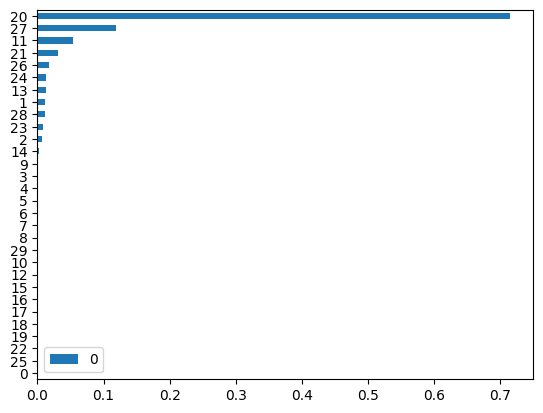

In [26]:
df.sort_values(by=0).plot(kind='barh')

validation

In [27]:
idx = df[ df[0] > 0.005 ].index
idx.values

array([ 1,  2, 11, 13, 20, 21, 23, 24, 26, 27, 28])

In [28]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train[:, idx],y_train)
y_pred = dt.predict(X_test[:, idx])
accuracy_score(y_test, y_pred)

0.9210526315789473

In [29]:
dt

DecisionTreeClassifier(max_depth=5, random_state=42)

[Text(0.6136363636363636, 0.9166666666666666, 'x[4] <= 16.795\ngini = 0.468\nsamples = 455\nvalue = [170, 285]'),
 Text(0.36363636363636365, 0.75, 'x[9] <= 0.136\ngini = 0.162\nsamples = 304\nvalue = [27, 277]'),
 Text(0.13636363636363635, 0.5833333333333334, 'x[10] <= 0.157\ngini = 0.036\nsamples = 271\nvalue = [5, 266]'),
 Text(0.09090909090909091, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.18181818181818182, 0.4166666666666667, 'x[3] <= 38.605\ngini = 0.029\nsamples = 270\nvalue = [4, 266]'),
 Text(0.09090909090909091, 0.25, 'x[5] <= 29.985\ngini = 0.015\nsamples = 259\nvalue = [2, 257]'),
 Text(0.045454545454545456, 0.08333333333333333, 'gini = 0.0\nsamples = 226\nvalue = [0, 226]'),
 Text(0.13636363636363635, 0.08333333333333333, 'gini = 0.114\nsamples = 33\nvalue = [2, 31]'),
 Text(0.2727272727272727, 0.25, 'x[2] <= 2.007\ngini = 0.298\nsamples = 11\nvalue = [2, 9]'),
 Text(0.22727272727272727, 0.08333333333333333, 'gini = 0.0\nsamples = 8\nvalue = [0

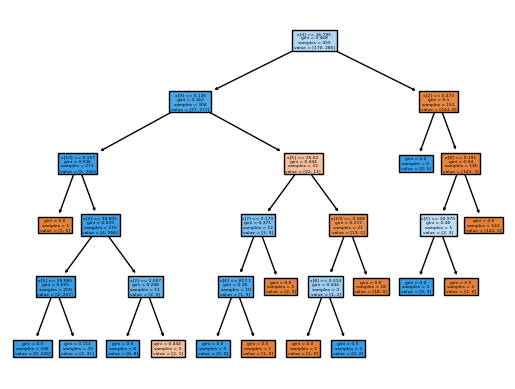

In [30]:
tree.plot_tree(dt, filled=True)

In [31]:
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
accuracy_score(y_test, y_pred)

0.9385964912280702

In [32]:
dt.feature_importances_

array([0.        , 0.01184648, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01332729, 0.        , 0.        ,
       0.        , 0.04578469, 0.        , 0.01270366, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.73354757, 0.03231926, 0.        , 0.        , 0.        ,
       0.        , 0.01716116, 0.12202752, 0.01128236, 0.        ])